In [237]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')
from statsmodels.formula.api import ols

# Get DataFrame

In [240]:
df=pd.read_csv('/home/louisedantas/code/LouiseDantas/vinted/Pricingdata.csv')

In [241]:
df.head()

,category_2,category_3,number_of_listings,avg_listing_price_eur,revenue_from_push_ups
0,ACCESSORIES_JEWELLERY,ACCESS_MOBILE,14228,28.081851,492.0
1,ACCESSORIES_JEWELLERY,BELTS,29838,21.273161,1382.0
2,ACCESSORIES_JEWELLERY,GLOVES,6350,17.043860,304.0
3,ACCESSORIES_JEWELLERY,JEWELRY,343493,17.935880,20554.0
4,ACCESSORIES_JEWELLERY,KEY_RINGS,5,15.900000,NaN


# Clean and Process Data

a. Check for Duplicates

In [242]:
df[df.duplicated()]
duplicate_count=len(df[df.duplicated()])

In [243]:
duplicate_count

2

b. Check for Missing Values

In [244]:
df.isnull().sum()/len(df)

category_2               0.004202
category_3               0.033613
number_of_listings       0.000000
avg_listing_price_eur    0.000000
revenue_from_push_ups    0.063025
dtype: float64

In [245]:
#replace push ups with zero
df['revenue_from_push_ups']=df['revenue_from_push_ups'].fillna(0)

In [246]:
df[df['category_3'].isna()]

,category_2,category_3,number_of_listings,avg_listing_price_eur,revenue_from_push_ups
15,ALL_OTHERS,NaN,70215,18.269067,3274.0
75,CLO_SETS,NaN,1786,10.963539,0.0
124,GIR_OTHER_CLOTHES,NaN,769,7.701365,36.0
125,GIR_SETS,NaN,2594,9.851823,0.0
178,MEN_VESTS,NaN,2719,39.643781,214.0
211,TABLES_FOR_DIAPERS_CHANGING,NaN,465,70.632237,38.0
219,TRADITIONAL_NATIONAL_CLOTHING,NaN,838,52.401539,120.0
237,NaN,NaN,35999,34.067395,2532.0


c. Check Outliers

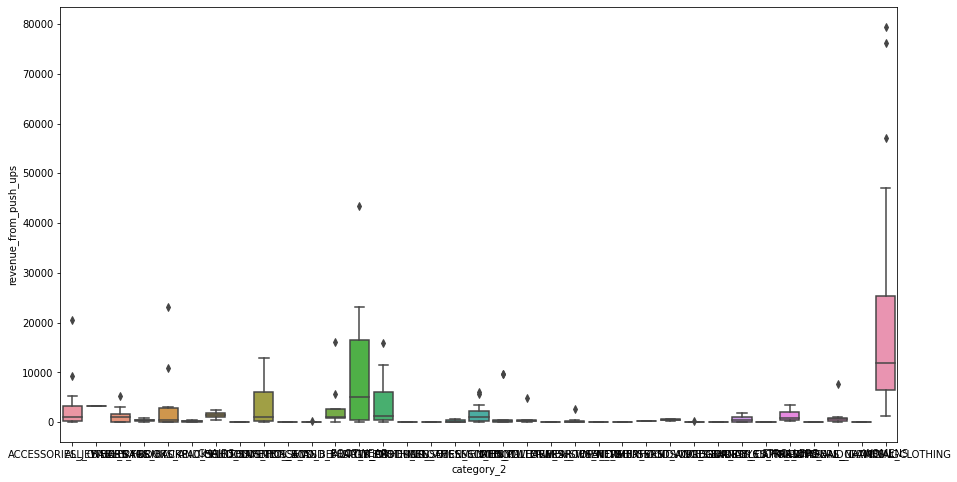

In [247]:
plt.figure(figsize=(15,8))
sns.boxplot(x = df["category_2"], y = df["revenue_from_push_ups"])
plt.show()

# Create new Columns

In [248]:
df['total_listing_inventory']=df['number_of_listings']*df['avg_listing_price_eur']

In [249]:
df['rev_push_ups_on_tot_inv']=df['revenue_from_push_ups']/df['total_listing_inventory']*100

In [250]:
df['qty_push_up']=df['revenue_from_push_ups']/2
df['perc_push_up']=(df['qty_push_up']/df['number_of_listings'])*100

In [258]:
df['push_up_as_perc_item']=(2/df['avg_listing_price_eur'])*100

In [267]:
df['category_concat']=df['category_2']+'_'+df['category_3']

# Section I

## A - Are users interested in PushUps? Which categories perform the best

### How many push ups in relation to the number of listings

In [262]:
df['qty_push_up'].sum()/df['number_of_listings'].sum()

0.03205550279162736

### Finding Macro Categories that has higher % of push ups in revenue

In [269]:
df_cat_push_up=df[['category_concat','rev_push_ups_on_tot_inv']].groupby(by=["category_concat"],dropna=False).mean()

In [270]:
df_cat_push_up.sort_values(by='rev_push_ups_on_tot_inv', ascending=False).head(5)

,rev_push_ups_on_tot_inv
category_concat,
BAGS_BACKPACKS_SATCHELS_NEW,1.075269
OUTDOOR_TOYS_SKIS_AND_SNOWBOARDS,0.650909
MOVING_GEAR_ROLLER_SKATES,0.617998
MOVING_GEAR_BABY_BOUNCY_SEATS,0.615193
COSMETICS_AND_BEAUTY_PRODUCTS_WOM_COS_MAK_COSMETICS,0.592058


### Which Categories Perform the best on percentage push up volume

In [272]:
df_cat_push_up=df[['category_concat','perc_push_up']].groupby(by=["category_concat"],dropna=False).mean()
df_cat_push_up.sort_values(by='perc_push_up', ascending=False).head(5)

,perc_push_up
category_concat,
MEN_SHOES_NEW_MEN_FORMAL,18.181818
STROLLERS_SPORT_STROLLERS,9.237421
STROLLERS_UMBRELLA_SHAPE_STROLLERS,9.025944
BABY_FURNITURE_NURSERIES,8.814959
MEN_OUTERWEAR_MEN_OUT_HALF_LENGTH_COATS,8.633406


### Categories with higher absolute push ups volume

In [271]:
df_cat3_push_up=df[['category_concat','qty_push_up']].groupby(by=["category_concat"],dropna=False).mean()
df_cat3_push_up.sort_values(by='qty_push_up', ascending=False).head(5)

,qty_push_up
category_concat,
WOMENS_DRESSES,39712.0
WOMENS_TOPS_T_SHIRTS,38083.0
WOMENS_OUTERWEAR,28516.0
WOMENS_PULLOVERS_SWEATERS,23564.0
FOOTWEAR_W_TRAINERS,21679.0


### To find out if users are interested in this category I would look at quantity of push ups. We see that the push ups corresponds to 3% of our listings volume.  As total push-up quantity, categories Womens_dresses, womens_top_tshirts and womens_outerwear are the top 3. 

## B Metric correlates with %of push up inventory

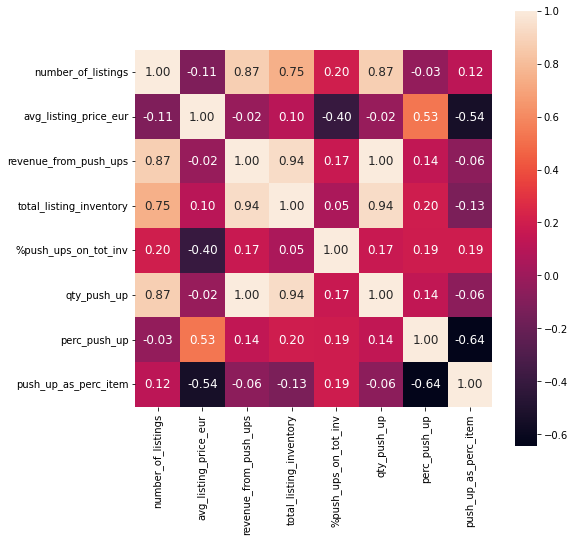

In [192]:
df_corr=df.corr()
plt.figure(figsize=(8,8))
hm = sns.heatmap(df_corr, annot=True, square=True, fmt='.2f', annot_kws={'size': 12})
plt.show()

In [290]:
df_clean=df[df['perc_push_up']>0]
df_clean=df_clean[df_clean['avg_listing_price_eur']<100]
df_clean=df_clean[df_clean['push_up_as_perc_item']<40]

<AxesSubplot:xlabel='perc_push_up', ylabel='push_up_as_perc_item'>

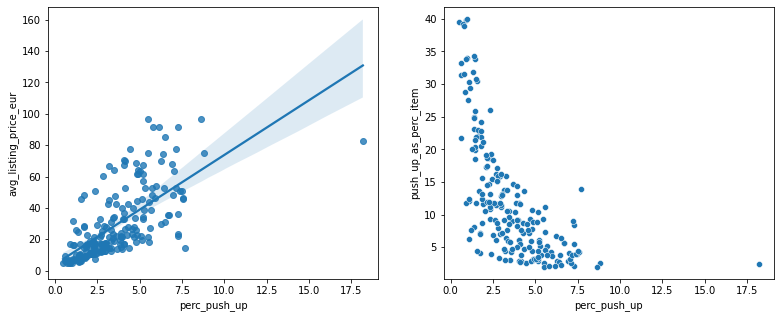

In [291]:
plt.figure(figsize=(13,5))

plt.subplot(1,2,1)
sns.regplot(x = df_clean.perc_push_up, y= df_clean.avg_listing_price_eur,y_jitter=.1)
#plt.xlim(right=1)
#plt.ylim(bottom=0)
#plt.ylim(top=100)

plt.subplot(1,2,2)
sns.scatterplot(x = df_clean.perc_push_up, y= df_clean.push_up_as_perc_item)
#plt.xlim(right=1)
#plt.ylim(bottom=0)
#plt.ylim(top=1000)

In [329]:
# Instanciate a model
model = smf.ols(formula='perc_push_up ~ avg_listing_price_eur', data=df_clean)

# Train the model to find best line
model = model.fit() 
model

In [330]:
print(model.params)

Intercept                1.633525
avg_listing_price_eur    0.067097
dtype: float64


In [331]:
model.rsquared

0.4679899165878474

## C Explain how push up is performing. Can we improve?

In [289]:
df['push_up_as_perc_item'].mean()

12.828346832480385

In [292]:
df['perc_push_up'].mean()

3.41824232632439

It does seem that we are not in the optimum point of the curve. We could have a lower push_up price as percentage of item price to drive more volume.

## Girls Clothing and For babies category

In [295]:
df_girls=df[df['category_2']=='GIRLS_CLOTHING']

<AxesSubplot:xlabel='perc_push_up', ylabel='push_up_as_perc_item'>

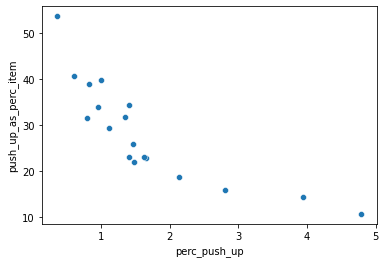

In [296]:
sns.scatterplot(x = df_girls.perc_push_up, y= df_girls.push_up_as_perc_item)

Some reasons: 
    1.A push up can incentivize buyers to buy more items from that seller 
    2.For children and baby clothing, the mom will not use the clothes anymore, so the seller doesnt need a big profit. The motivation is probably to declutter the house

# Section II - Analyse alternative strategies

## Change the push up price

In [195]:
#Number of categories existing 
n_cat3=len(df['category_3'].unique())
n_cat2=len(df['category_2'].unique())

In [305]:
avg_price=df['total_listing_inventory'].sum()/df['number_of_listings'].sum()
#push up as percentage of price
2/avg_price

0.09182852560038866

In [307]:
df['qty_push_up'].sum()/df['number_of_listings'].sum()

0.03205550279162736

In [198]:
df[df['category_2']=='ACCESSORIES_JEWELLERY']

,category_2,category_3,number_of_listings,avg_listing_price_eur,revenue_from_push_ups,total_listing_inventory,%push_ups_on_tot_inv,qty_push_up,perc_push_up,push_up_as_perc_item
0,ACCESSORIES_JEWELLERY,ACCESS_MOBILE,14228,28.081851,492.0,3.995486e+05,0.123139,246.0,1.728985,7.122038
1,ACCESSORIES_JEWELLERY,BELTS,29838,21.273161,1382.0,6.347486e+05,0.217724,691.0,2.315839,9.401518
2,ACCESSORIES_JEWELLERY,GLOVES,6350,17.043860,304.0,1.082285e+05,0.280887,152.0,2.393701,11.734431
3,ACCESSORIES_JEWELLERY,JEWELRY,343493,17.935880,20554.0,6.160849e+06,0.333623,10277.0,2.991910,11.150833
4,ACCESSORIES_JEWELLERY,KEY_RINGS,5,15.900000,0.0,7.950000e+01,0.000000,0.0,0.000000,12.578616
5,ACCESSORIES_JEWELLERY,OTHER_ACCESSORIES_AND_JEWELLERY,52245,33.023548,2782.0,1.725315e+06,0.161246,1391.0,2.662456,6.056285
6,ACCESSORIES_JEWELLERY,SOCKS_TIGHTS_STOCKINGS,8741,6.555352,270.0,5.730033e+04,0.471201,135.0,1.544446,30.509423
7,ACCESSORIES_JEWELLERY,SUNGLASSES,34020,47.930943,3902.0,1.630611e+06,0.239297,1951.0,5.734862,4.172670
8,ACCESSORIES_JEWELLERY,TRADITIONA_ACCESSORIES_WOMEN,271,16.507380,6.0,4.473500e+03,0.134123,3.0,1.107011,12.115793
9,ACCESSORIES_JEWELLERY,WATCHES,66595,67.922934,9238.0,4.523328e+06,0.204230,4619.0,6.935956,2.944514


##  Dynamic pricing. % of listing price

We need to find the price elasticity curve. 

In [215]:
df.head()

,category_2,category_3,number_of_listings,avg_listing_price_eur,revenue_from_push_ups,total_listing_inventory,%push_ups_on_tot_inv,qty_push_up,perc_push_up,push_up_as_perc_item
0,ACCESSORIES_JEWELLERY,ACCESS_MOBILE,14228,28.081851,492.0,3.995486e+05,0.123139,246.0,1.728985,7.122038
1,ACCESSORIES_JEWELLERY,BELTS,29838,21.273161,1382.0,6.347486e+05,0.217724,691.0,2.315839,9.401518
2,ACCESSORIES_JEWELLERY,GLOVES,6350,17.043860,304.0,1.082285e+05,0.280887,152.0,2.393701,11.734431
3,ACCESSORIES_JEWELLERY,JEWELRY,343493,17.935880,20554.0,6.160849e+06,0.333623,10277.0,2.991910,11.150833
4,ACCESSORIES_JEWELLERY,KEY_RINGS,5,15.900000,0.0,7.950000e+01,0.000000,0.0,0.000000,12.578616


In [223]:
#remove some outliers
df_price_elast=df[df['push_up_as_perc_item']<40]
df_price_elast=df_price_elast[df_price_elast['perc_push_up']>0]

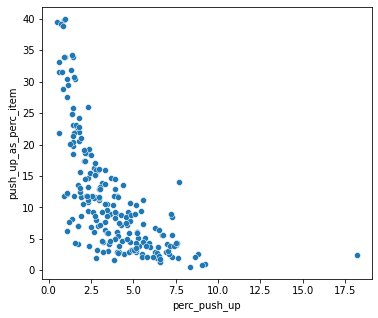

In [225]:
plt.figure(figsize=(13,5))

plt.subplot(1,2,1)
sns.scatterplot(x = df_price_elast.perc_push_up, y= df_price_elast.push_up_as_perc_item)
plt.show()

In [347]:
model2 = smf.ols(formula='perc_push_up ~ push_up_as_perc_item', data=df_price_elast)
model2 = model2.fit() 
model2

In [348]:
model2.rsquared

0.4467756911537607

In [350]:
pd.read_csv('/home/louisedantas/code/LouiseDantas/vinted/Pricingdata.csv')

,category_2,category_3,number_of_listings,avg_listing_price_eur,revenue_from_push_ups
0,ACCESSORIES_JEWELLERY,ACCESS_MOBILE,14228,28.081851,492.0
1,ACCESSORIES_JEWELLERY,BELTS,29838,21.273161,1382.0
2,ACCESSORIES_JEWELLERY,GLOVES,6350,17.043860,304.0
3,ACCESSORIES_JEWELLERY,JEWELRY,343493,17.935880,20554.0
4,ACCESSORIES_JEWELLERY,KEY_RINGS,5,15.900000,NaN
...,...,...,...,...,...
233,WOMENS,SWIMWEAR,91268,17.032203,5374.0
234,WOMENS,SKIRTS,214910,13.239253,11830.0
235,WOMENS,TOPS_T_SHIRTS,1844512,10.469959,76166.0
236,WOMENS,TROUSERS,317747,15.378983,19136.0


###  PRICE ELASTICITY

In [310]:
#model = ols("perc_push_up ~ avg_listing_price_eur", data=df_price_elast).fit()
#print(model.summary())
#fig = plt.figure(figsize=(12,8))
#fig = sm.graphics.plot_partregress_grid(model, fig=fig)
#fig = plt.figure(figsize=(12,8))
#fig = sm.graphics.plot_regress_exog(model, 'avg_listing_price_eur', fig=fig)

I wont have time to calculate the increase on revenue.
Ideally I would:
  -create a vector of price percentages
  - for every price percentage I would calculate the increase or decrease on push up volumes(demand) and therefore calculate total revenue
    - at the end, for every price % I would have the correspondent Revenue and I would choose the % that maximize the revenue.
    

In [349]:
df_new_rev

,category_2,category_3,number_of_listings,avg_listing_price_eur,revenue_from_push_ups,push_up_price_perc,perc_qty,push_up_price,push_up_qty,Revenue_dinamic_price
0,ACCESSORIES_JEWELLERY,ACCESS_MOBILE,14228,28.081851,492.0,0.095,0.04,2.667776,569.12,1518.284604
1,ACCESSORIES_JEWELLERY,BELTS,29838,21.273161,1382.0,0.095,0.04,2.020950,1193.52,2412.044642
2,ACCESSORIES_JEWELLERY,GLOVES,6350,17.043860,304.0,0.095,0.04,1.619167,254.00,411.268338
3,ACCESSORIES_JEWELLERY,JEWELRY,343493,17.935880,20554.0,0.095,0.04,1.703909,13739.72,23411.227074
4,ACCESSORIES_JEWELLERY,KEY_RINGS,5,15.900000,NaN,0.095,0.04,1.510500,0.20,0.302100
...,...,...,...,...,...,...,...,...,...,...
233,WOMENS,SWIMWEAR,91268,17.032203,5374.0,0.095,0.04,1.618059,3650.72,5907.081266
234,WOMENS,SKIRTS,214910,13.239253,11830.0,0.095,0.04,1.257729,8596.40,10811.941868
235,WOMENS,TOPS_T_SHIRTS,1844512,10.469959,76166.0,0.095,0.04,0.994646,73780.48,73385.464416
236,WOMENS,TROUSERS,317747,15.378983,19136.0,0.095,0.04,1.461003,12709.88,18569.177508


9 to 10%

In [339]:
df_new_rev=pd.read_csv('/home/louisedantas/code/LouiseDantas/vinted/Pricingdata.csv')

In [340]:
df_new_rev['push_up_price_perc']=0.095
df_new_rev['perc_qty']=0.04

In [341]:
df_new_rev['push_up_price']=df_new_rev['push_up_price_perc']*df_new_rev['avg_listing_price_eur']
df_new_rev['push_up_qty']=df_new_rev['perc_qty']*df_new_rev['number_of_listings']

In [342]:
df_new_rev['Revenue_dinamic_price']=df_new_rev['push_up_price']*df_new_rev['push_up_qty']

In [343]:
Increase_in_Revenue=df_new_rev['Revenue_dinamic_price'].sum()/df_new_rev['revenue_from_push_ups'].sum()

In [344]:
Increase_in_Revenue-1

0.2909320764789043

In [345]:
df_new_rev['Revenue_dinamic_price'].sum()

1154018.4023117046

In [346]:
df_new_rev['Revenue_dinamic_price'].sum()/df_new_rev['revenue_from_push_ups'].sum()

1.2909320764789043